<a href="https://colab.research.google.com/github/elkanjeremy/elkanjeremy/blob/main/WhatDish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [6]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle
#Check the present working directory using pwd command

/content/gdrive/My Drive/Kaggle


In [44]:
!kaggle datasets download -d kmader/food41

100% 5.29G/5.30G [01:21<00:00, 107MB/s]
100% 5.30G/5.30G [01:21<00:00, 70.1MB/s]


In [7]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/tacos/1026681.jpg  
  inflating: images/tacos/1030289.jpg  
  inflating: images/tacos/1033196.jpg  
  inflating: images/tacos/1036030.jpg  
  inflating: images/tacos/1042175.jpg  
  inflating: images/tacos/1044043.jpg  
  inflating: images/tacos/1058697.jpg  
  inflating: images/tacos/1059239.jpg  
  inflating: images/tacos/1059326.jpg  
  inflating: images/tacos/1066762.jpg  
  inflating: images/tacos/1070967.jpg  
  inflating: images/tacos/1073468.jpg  
  inflating: images/tacos/1075296.jpg  
  inflating: images/tacos/1085243.jpg  
  inflating: images/tacos/108529.jpg  
  inflating: images/tacos/1086014.jpg  
  inflating: images/tacos/108945.jpg  
  inflating: images/tacos/1089575.jpg  
  inflating: images/tacos/1091159.jpg  
  inflating: images/tacos/1101369.jpg  
  inflating: images/tacos/1109058.jpg  
  inflating: images/tacos/1109744.jpg  
  inflating: images/tacos/1119371.jpg  
  inflating: images/tacos/11237

In [8]:
image_dir = Path('/content/gdrive/My Drive/Kaggle/images')

In [9]:
filepaths = list(image_dir.glob(r'**/*.jpg'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

images = pd.concat([filepaths, labels], axis=1)

category_samples = []
for category in images['Label'].unique():
    category_slice = images.query("Label == @category")
    category_samples.append(category_slice.sample(100, random_state=1))
images_df = pd.concat(category_samples, axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)

In [10]:
images_df

,Filepath,Label
0,/content/gdrive/My Drive/Kaggle/images/paella/...,paella
1,/content/gdrive/My Drive/Kaggle/images/steak/2...,steak
2,/content/gdrive/My Drive/Kaggle/images/bread_p...,bread_pudding
3,/content/gdrive/My Drive/Kaggle/images/waffles...,waffles
4,/content/gdrive/My Drive/Kaggle/images/french_...,french_toast
...,...,...
10095,/content/gdrive/My Drive/Kaggle/images/croque_...,croque_madame
10096,/content/gdrive/My Drive/Kaggle/images/poutine...,poutine
10097,/content/gdrive/My Drive/Kaggle/images/breakfa...,breakfast_burrito
10098,/content/gdrive/My Drive/Kaggle/images/guacamo...,guacamole


In [11]:
images_df['Label'].value_counts()

pizza                  100
ceviche                100
omelette               100
donuts                 100
ramen                  100
                      ... 
mussels                100
spring_rolls           100
greek_salad            100
spaghetti_bolognese    100
tacos                  100
Name: Label, Length: 101, dtype: int64

# New section

In [12]:
import os, time
os.environ['PYTHONHASHSEED']=str(1)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# %load_ext tensorboard
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('seaborn-deep')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 14
plt.rcParams['figure.figsize'] = (12, 8)

pd.options.mode.chained_assignment = None
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 400)
import warnings
warnings.filterwarnings('ignore')
import sklearn.metrics as skm
import sklearn.model_selection as skms
import sklearn.preprocessing as skp
import random
seed = 12
from skimage.transform import resize
from skimage import img_as_ubyte
from imageio import imread
import datetime

def set_seed():
    global seed
    os.environ['PYTHONHASHSEED']=str(seed)
    tf.random.set_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

set_seed()

In [13]:
import json
folder_main = '/content/gdrive/My Drive/Kaggle'
folder_images = os.path.join(folder_main, 'images')
trainjson_fp = folder_main+'/meta/meta/train.json'
testjson_fp = folder_main+'/meta/meta/test.json'
with open(trainjson_fp, 'r') as f:
    trainjson = json.load(f)
with open(testjson_fp, 'r') as f:
    testjson = json.load(f)
labels = list(trainjson.keys())
labels[:5]

['churros', 'hot_and_sour_soup', 'samosa', 'sashimi', 'pork_chop']

In [14]:
def readImg(img):
    global folder_images
    return imread(os.path.join(folder_images, img+'.jpg'))

def showImg(img):
    plt.figure(figsize=(5,5))
    plt.imshow(img)
    plt.show()

Total number of samples for train 75750
Some samples are ['huevos_rancheros/3259111', 'lobster_roll_sandwich/135876', 'mussels/960208', 'chicken_wings/808799', 'poutine/3267969']
Sample Image Shape (512, 512, 3)


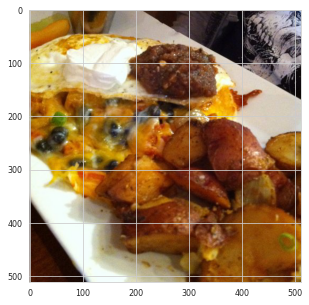

In [15]:
# Buat training data
set_seed()
train_samples = list(np.random.permutation(list(pd.core.common.flatten(trainjson.values()))))
print("Total number of samples for train",len(train_samples))
print("Some samples are",train_samples[:5])
sample_img = readImg(train_samples[0])
print("Sample Image Shape",sample_img.shape)
showImg(sample_img)

Total number of samples for test 25250
Some samples are ['ramen/3402528', 'omelette/440211', 'strawberry_shortcake/2230724', 'edamame/709288', 'waffles/1950148']
Sample Image Shape (512, 512, 3)


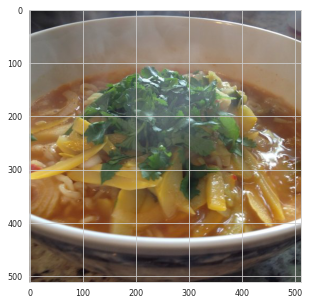

In [16]:
# create testing data
set_seed()
test_samples = list(np.random.permutation(list(pd.core.common.flatten(testjson.values()))))
print("Total number of samples for test",len(test_samples))
print("Some samples are",test_samples[:5])
sample_img = readImg(test_samples[0])
print("Sample Image Shape",sample_img.shape)
showImg(sample_img)

In [17]:
# get image with min size
shapeX, shapeY = [1000, 1000], [1000, 1000]
for i, img in enumerate(train_samples):
    print("\rReading",i+1,"of total",len(train_samples),"images", end='')
    imgShape = readImg(img).shape
    if imgShape[0] < shapeX[0]:
         shapeX = imgShape[:2]
    if imgShape[1] < shapeY[1]:
         shapeY = imgShape[:2]
print("\nLowest training image shape - shapeX:", shapeX,", shapeY:",shapeY)

Reading 355 of total 75750 images

KeyboardInterrupt: ignored

In [1]:
# remove images with one channel
train_sample_one = []
for i, x in enumerate(train_samples):
    print("\rReading",i+1,"of total",len(train_samples),"images", end='')
    imgShape = readImg(x)
    if len(imgShape.shape) != 3:
        train_sample_one.append(x)
print(len(train_sample_one),"images are of single channel")
showImg(readImg('lasagna/3787908'))

NameError: ignored

In [55]:
train_sample_one = ['lasagna/3787908', 'bread_pudding/1375816', 'steak/1340977']
train_samples = [x for x in train_samples if x not in train_sample_one]
print("Remaining samples for train are",len(train_samples))

Remaining samples for train are 75747


Total number of samples for train 5050
Some samples are ['lasagna/1157283', 'creme_brulee/1126213', 'pad_thai/1009595', 'red_velvet_cake/114712', 'grilled_cheese_sandwich/1143271']
Sample Image Shape (307, 512, 3)


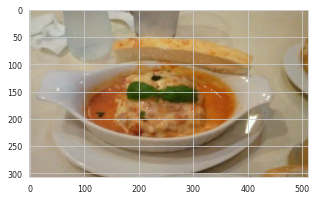

In [18]:
# create training data
train_samples_subset_list = []
for x in trainjson.keys():
    train_samples_subset_list.extend(trainjson[x][:50])
set_seed()
train_samples_subset = list(np.random.permutation(train_samples_subset_list))
print("Total number of samples for train",len(train_samples_subset))
print("Some samples are",train_samples_subset[:5])
sample_img = readImg(train_samples_subset[0])
print("Sample Image Shape",sample_img.shape)
showImg(sample_img)

Total number of samples for test 2020
Some samples are ['baby_back_ribs/1228072', 'crab_cakes/1009091', 'sashimi/1017182', 'foie_gras/1272544', 'pancakes/1149120']
Sample Image Shape (512, 512, 3)


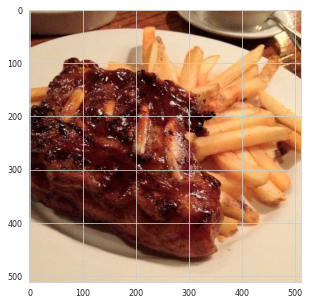

In [19]:
# create testing data
test_samples_subset_list = []
for x in testjson.keys():
    test_samples_subset_list.extend(testjson[x][:20])
set_seed()
test_samples_subset = list(np.random.permutation(test_samples_subset_list))
print("Total number of samples for test",len(test_samples_subset))
print("Some samples are",test_samples_subset[:5])
sample_img = readImg(test_samples_subset[0])
print("Sample Image Shape",sample_img.shape)
showImg(sample_img)

In [20]:
# map labels to index
label_index = dict()
index_label = dict()
for i, x in enumerate(labels):
    label_index[x] = i
    index_label[i] = x
print(label_index)
print(index_label)

{'churros': 0, 'hot_and_sour_soup': 1, 'samosa': 2, 'sashimi': 3, 'pork_chop': 4, 'spring_rolls': 5, 'panna_cotta': 6, 'beef_tartare': 7, 'greek_salad': 8, 'foie_gras': 9, 'tacos': 10, 'pad_thai': 11, 'poutine': 12, 'ramen': 13, 'pulled_pork_sandwich': 14, 'bibimbap': 15, 'beignets': 16, 'apple_pie': 17, 'crab_cakes': 18, 'risotto': 19, 'paella': 20, 'steak': 21, 'baby_back_ribs': 22, 'miso_soup': 23, 'frozen_yogurt': 24, 'club_sandwich': 25, 'carrot_cake': 26, 'falafel': 27, 'bread_pudding': 28, 'chicken_wings': 29, 'gnocchi': 30, 'caprese_salad': 31, 'creme_brulee': 32, 'escargots': 33, 'chocolate_cake': 34, 'tiramisu': 35, 'spaghetti_bolognese': 36, 'mussels': 37, 'scallops': 38, 'baklava': 39, 'edamame': 40, 'macaroni_and_cheese': 41, 'pancakes': 42, 'garlic_bread': 43, 'beet_salad': 44, 'onion_rings': 45, 'red_velvet_cake': 46, 'grilled_salmon': 47, 'chicken_curry': 48, 'deviled_eggs': 49, 'caesar_salad': 50, 'hummus': 51, 'fish_and_chips': 52, 'lasagna': 53, 'peking_duck': 54, 'g

In [21]:
# hyper-parameters

img_tensor = [128, 128, 3]

In [22]:
def cropResize(image, y, z):
    return img_as_ubyte(resize(image, (y,z)))

def normalizeImage(image):
    # applying normalization
    return image/255.0

def preprocessImage(image, y, z):
    return normalizeImage(cropResize(image, y, z))

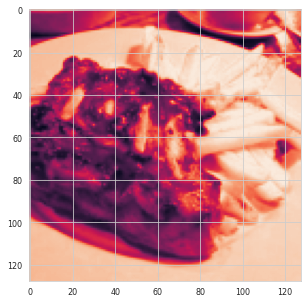

In [23]:
# display sample preprocessed image 
sample_img_r = sample_img[:, :, 0]
sample_img_r_pre = preprocessImage(sample_img_r, 128, 128)
showImg(sample_img_r_pre)

In [24]:
# flip
def flipImage(img):
    return np.flip(img)

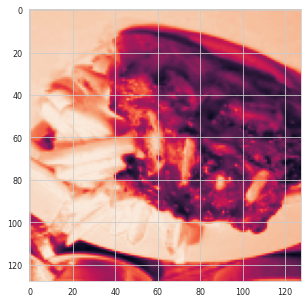

In [25]:
# display sample preprocessed image 
sample_img_r = sample_img[:, :, 0]
sample_img_r_pre = preprocessImage(flipImage(sample_img_r), 128, 128)
showImg(sample_img_r_pre)

In [26]:
def getBatchData(t, batch, batch_size, flip):
    global img_tensor, labels
    [h, w, c] = [img_tensor[0], img_tensor[1], img_tensor[2]]
    batch_data = np.zeros((batch_size,h,w,c)) # generating null image representations
    batch_labels = np.zeros((batch_size, len(labels))) # batch_labels is the one hot representation of output
    if flip:
        batch_data_flip = np.zeros((batch_size,h,w,c))
        batch_labels_flip = np.zeros((batch_size, len(labels)))
    # batch_labels = []
    for idx in range(batch_size): # iterating over the batch_size
        imgPath = t[idx + (batch*batch_size)]
        imgLabel = imgPath.strip().split('/')[0]
        image = readImg(imgPath)

        # separate preprocessImage function is defined for cropping, resizing and normalizing images
        batch_data[idx,:,:,0] = preprocessImage(image[:, :, 0], h, w)
        batch_data[idx,:,:,1] = preprocessImage(image[:, :, 1], h, w)
        batch_data[idx,:,:,2] = preprocessImage(image[:, :, 2], h, w)

        batch_labels[idx, label_index[imgLabel]] = 1

        if flip:
            batch_data_flip[idx,:,:,0] = preprocessImage(flipImage(image[:, :, 0]), h, w)
            batch_data_flip[idx,:,:,1] = preprocessImage(flipImage(image[:, :, 1]), h, w)
            batch_data_flip[idx,:,:,2] = preprocessImage(flipImage(image[:, :, 2]), h, w)

            batch_labels_flip[idx, label_index[imgLabel]] = 1
    if flip:
        batch_data = np.concatenate((batch_data, batch_data_flip))
        batch_labels = np.concatenate((batch_labels, batch_labels_flip))

    return batch_data, batch_labels

In [27]:
def generator(folder_list, batch_size, flip=False):
    print('\nLoading from', len(folder_list), 'images; batch size =', batch_size)
    while True:
        num_batches = int(len(folder_list)/batch_size)
        for batch in range(num_batches): # we iterate over the number of batches
#             print("\rReading batch",str(batch+1),"of total",str(num_batches), end='')
            yield getBatchData(folder_list, batch, batch_size, flip)
        
        # checking if any remaining batches are there or not
        if len(folder_list)%batch_size != 0:
            # updated the batch size and yield
            batch_size_rem = len(folder_list)%batch_size
            yield getBatchData(folder_list, batch, batch_size_rem, flip)
        


Loading from 5050 images; batch size = 16

Sample Train batch data shape (32, 128, 128, 3)
Train Batch labels [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
Sample train batch image


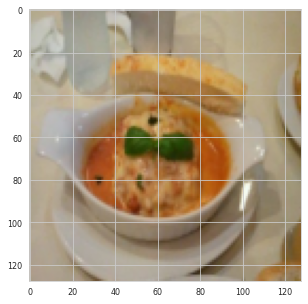


Loading from 2020 images; batch size = 8

Sample Test batch data shape (8, 128, 128, 3)
Test Batch labels [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
Sample test batch image


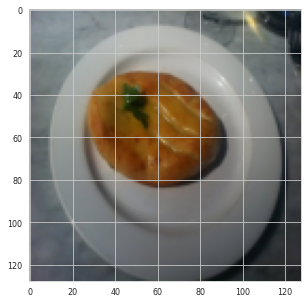

In [28]:
# check complete batch shape
sample_generator = generator(train_samples_subset, batch_size=16, flip=True)
sample_batch_data, sample_batch_labels = next(sample_generator)
print("\nSample Train batch data shape", sample_batch_data.shape)
print("Train Batch labels", sample_batch_labels[0])
print("Sample train batch image")
showImg(sample_batch_data[0])

# validation batch sample
sample_test_generator = generator(test_samples_subset, batch_size=8)
sample_test_batch_data, sample_test_batch_labels = next(sample_test_generator)
print("\nSample Test batch data shape", sample_test_batch_data.shape)
print("Test Batch labels", sample_test_batch_labels[0])
print("Sample test batch image")
showImg(sample_test_batch_data[-2])

In [29]:
def plotModelHistory(h):
    fig, ax = plt.subplots(1, 2, figsize=(15,4))
    ax[0].plot(h.history['loss'])   
    ax[0].plot(h.history['val_loss'])
    ax[0].legend(['loss','val_loss'])
    ax[0].title.set_text("Train loss vs Validation loss")

    ax[1].plot(h.history['categorical_accuracy'])   
    ax[1].plot(h.history['val_categorical_accuracy'])
    ax[1].legend(['categorical_accuracy','val_categorical_accuracy'])
    ax[1].title.set_text("Train accuracy vs Validation accuracy")

    print("Max. Training Accuracy", max(h.history['categorical_accuracy']))
    print("Max. Validaiton Accuracy", max(h.history['val_categorical_accuracy']))

In [30]:
logPath = './logs/'
if not os.path.exists(logPath):
    os.mkdir(logPath)
# %load_ext tensorboard
# %tensorboard --logdir logPath

# selected set for training and prediction
train_set = train_samples
test_set = test_samples

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        ACCURACY_THRESHOLD = 0.90
        if(logs.get('val_categorical_accuracy') > ACCURACY_THRESHOLD):
            print("\n\nStopping training as we have reached %2.2f%% accuracy!" %(ACCURACY_THRESHOLD*100))   
            self.model.stop_training = True


def trainModel(model, epochs, optimizer, vb=1, modelName='model'):
    global train_set, test_set
    !rm -rf ./logs/
    logs = logPath + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    batch_size = 128
    bestModelPath = './'+modelName+'_model.hdf5'
    callback = myCallback()
    cbs = [callback,
           tf.keras.callbacks.TensorBoard(log_dir=logs, histogram_freq=1),
           tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_categorical_accuracy',patience = 5, verbose = 1),
           tf.keras.callbacks.EarlyStopping(monitor = 'val_categorical_accuracy',patience = 5,verbose = 1,restore_best_weights = True),
           tf.keras.callbacks.ModelCheckpoint(filepath=bestModelPath, monitor='val_loss', verbose=1, save_best_only=True)]

    # setup generators for training
    
    train_generator = generator(train_set, batch_size, flip=True)
    test_generator = generator(test_set, batch_size, flip=True)
    
    num_train_sequences = len(train_set)
    print('# training sequences =', num_train_sequences)
    num_test_sequences = len(test_set)
    print('# test sequences =', num_test_sequences)

    if (num_train_sequences%batch_size) == 0:
        steps_per_epoch = int(num_train_sequences/batch_size)
    else:
        steps_per_epoch = (num_train_sequences//batch_size) + 1

    if (num_test_sequences%batch_size) == 0:
        validation_steps = int(num_test_sequences/batch_size)
    else:
        validation_steps = (num_test_sequences//batch_size) + 1

    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=[tf.keras.metrics.CategoricalAccuracy(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
    )
    return model.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=epochs,
                               validation_data=test_generator, validation_steps=validation_steps,
                               verbose=vb, batch_size=batch_size, callbacks=cbs)

In [31]:
def trainModelSingle(model, epochs, optimizer, vb=1, modelName='model'):
    global train_set, test_set
#     logs = logPath + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    batch_size = 128
    bestModelPath = './'+modelName+'_model.hdf5'
    callback = myCallback()
    cbs = [callback,
#            k.callbacks.TensorBoard(log_dir=logs, histogram_freq=1),
           tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_categorical_accuracy',patience = 5, verbose = 1),
           tf.keras.callbacks.EarlyStopping(monitor = 'val_categorical_accuracy',patience = 5,verbose = 1,restore_best_weights = True),
           tf.keras.callbacks.ModelCheckpoint(filepath=bestModelPath, monitor='val_loss', verbose=1, save_best_only=True)]

    # setup generators for training
    train_generator = generator(train_set, batch_size, flip=True)
    test_generator = generator(test_set, batch_size, flip=True)

    if (num_train_sequences%batch_size) == 0:
        steps_per_epoch = int(num_train_sequences/batch_size)
    else:
        steps_per_epoch = (num_train_sequences//batch_size) + 1

    if (num_test_sequences%batch_size) == 0:
        validation_steps = int(num_test_sequences/batch_size)
    else:
        validation_steps = (num_test_sequences//batch_size) + 1

    return model.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=epochs,
                               validation_data=test_generator, validation_steps=validation_steps,
                               verbose=vb, batch_size=batch_size, callbacks=cbs)

In [32]:
# evaluate model with time
def evaluate(model):
    global test_set
    batch_size = 128
    num_train_sequences = len(test_set)
    steps_per_epoch = 0
    if (num_train_sequences%batch_size) == 0:
        steps_per_epoch = int(num_train_sequences/batch_size)
    else:
        steps_per_epoch = (num_train_sequences//batch_size) + 1

    test_generator = generator(test_set, batch_size=batch_size)
    t1 = time.time()
    model = k.models.load_model(model)
    eval_results = model.evaluate_generator(test_generator, steps=steps_per_epoch)
    t2 = time.time()
    print(f'\nAccuracy: {eval_results[1]}, Loss: {eval_results[0]}')
    print(f'Total Prediction Time: {t2-t1}')
    print(f'FPS Prediction Time: {len(test_set)/(t2-t1)}')
    print(f'Prediction Time per Image: {(t2-t1)/len(test_samples_subset)}')

In [33]:
mobilenet = tf.keras.applications.mobilenet_v2.MobileNetV2(weights='imagenet', input_shape=img_tensor, include_top=False)
mobilenet.trainable = False

model = tf.keras.models.Sequential([
                             mobilenet,
                             tf.keras.layers.GlobalAveragePooling2D(),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(256, activation='relu'),
                             tf.keras.layers.BatchNormalization(),
                             tf.keras.layers.Dropout(0.1),
#                              k.layers.Dense(128, activation='relu'),
#                              k.layers.BatchNormalization(),
#                              k.layers.Dropout(0.1),
                             tf.keras.layers.Dense(len(index_label), activation='softmax')
])
print(model.summary())

9412608/9406464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_128 (Functi (None, 4, 4, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               327936    
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
___________________________________________________________

In [ ]:
trainModel(model, 1, 'adam', modelName='mobilenet')


# training sequences = 75750
# test sequences = 25250

Loading from 75750 images; batch size = 128
 17/592 [..............................] - ETA: 1:10:59 - loss: 4.7834 - categorical_accuracy: 0.0425 - precision: 0.2692 - recall: 0.0016